In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('linear_regression_data.csv')

In [3]:
data

,X,y
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440
...,...,...
95,0.987591,6.146963
96,1.045466,7.059295
97,0.855082,6.906398
98,0.050838,4.429206


In [5]:
pipeline =  Pipeline (steps=[
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])

In [6]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [7]:
X=data[['X']]
y=data['y']

In [10]:
X

,X
0,0.749080
1,1.901429
2,1.463988
3,1.197317
4,0.312037
...,...
95,0.987591
96,1.045466
97,0.855082
98,0.050838


In [12]:
train_X, test_X, train_y, test_y =  train_test_split(X,y, test_size=0.2, random_state=98)

In [13]:
pipeline.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [14]:
train_X.shape

(80, 1)

In [75]:
import numpy as np

In [76]:
X=np.array([[1.901429]])

In [77]:
pipeline.predict(X)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([9.48227008])

In [15]:
train_pred = pipeline.predict(train_X)
test_pred = pipeline.predict(test_X)

In [16]:
train_pred

array([8.48810878, 4.24568994, 4.32913892, 5.30088566, 8.50950778,
       4.46566559, 6.95848853, 4.75622182, 5.77153705, 6.20107758,
       7.49720721, 7.88561985, 6.65364079, 4.99584832, 9.48226901,
       4.56722383, 8.99688487, 5.94204621, 7.06407156, 6.29013335,
       4.47244198, 5.15983847, 5.32133419, 6.01749997, 9.68267359,
       6.95083574, 7.12236579, 9.13045595, 4.89121565, 4.57549673,
       6.04834625, 5.23119873, 4.70536469, 6.74182729, 8.65944935,
       8.82701716, 9.01390843, 7.32469911, 4.35592388, 8.4935073 ,
       9.5649166 , 5.64879594, 8.69380079, 7.11115457, 6.36845648,
       5.82857164, 9.32248848, 5.71843133, 8.56514904, 9.1726426 ,
       9.25293739, 9.58681487, 7.54540964, 7.58103241, 8.13124614,
       5.93800874, 8.13797881, 6.60816951, 6.0166855 , 4.53689254,
       8.43001785, 4.85703702, 7.53179992, 7.74730913, 4.98792378,
       8.25727984, 8.7329374 , 8.48642917, 6.24482385, 8.27050859,
       8.00590229, 5.3160261 , 4.62812363, 7.22175553, 6.83127

In [19]:
print("Train RMSE:",root_mean_squared_error(train_y,train_pred ))
print("Train R2",r2_score(train_y,train_pred ))

Train RMSE: 0.9251606189723819
Train R2 0.7639484901015976


In [20]:
print("Test RMSE:",root_mean_squared_error(test_y,test_pred ))
print("Test R2",r2_score(test_y,test_pred  ))

Test RMSE: 0.7805345195734928
Test R2 0.7952228650836128


In [24]:
joblib.dump(pipeline,'pipline_lr_deploy.pkl')

['pipline_lr_deploy.pkl']

In [28]:
pipeline.named_steps['model'].coef_

array([1.6398973])

In [29]:
pipeline.named_steps['model'].intercept_

np.float64(6.820004100101898)

<Axes: >

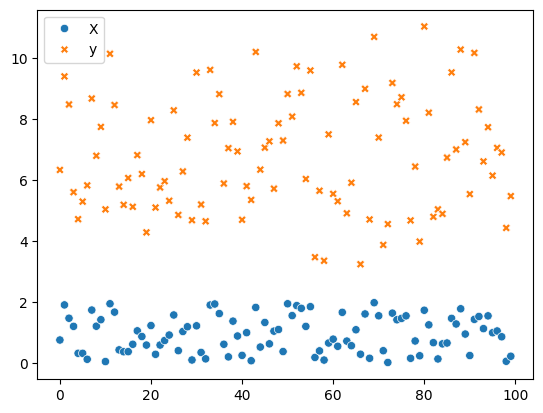

In [32]:
sns.scatterplot(data)

In [58]:
chk=pipeline.named_steps['scaler']
chk

StandardScaler()

StandardScaler()

In [46]:
new_data=pd.DataFrame(data['X'])

In [48]:
new_data['y']=pipeline.predict(data[['X']])

In [49]:
new_data

,X,y
0,0.749080,6.290133
1,1.901429,9.482269
2,1.463988,8.270509
3,1.197317,7.531800
4,0.312037,5.079475
...,...,...
95,0.987591,6.950836
96,1.045466,7.111155
97,0.855082,6.583770
98,0.050838,4.355924


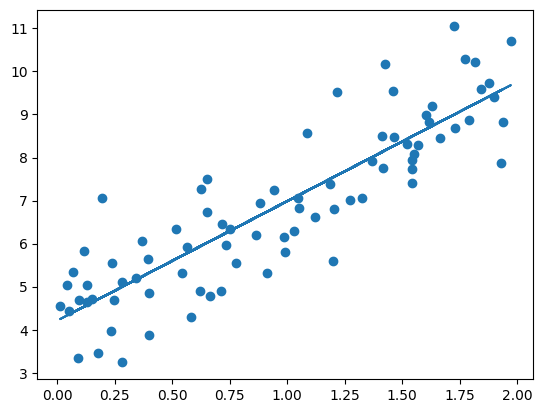

In [69]:
plt.scatter(train_X,train_y)
plt.plot(train_X,train_pred)
plt.show()